In [1]:
def keras_plotter(history):
    import pandas as pd
    import matplotlib.pyplot as plt
    
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.savefig("partb_final.jpeg")
    plt.show()
   

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()

from sklearn.model_selection import StratifiedShuffleSplit
strat_split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_index,test_index in strat_split.split(x_train_val,y_train_val):
    x_train,y_train=x_train_val[train_index],y_train_val[train_index]
    x_val,y_val=x_train_val[test_index],y_train_val[test_index]
    
x_train_val=x_train_val.reshape((50000,3072))
x_train=x_train.reshape((40000,3072))
x_val=x_val.reshape((10000,3072))
x_test=x_test.reshape((10000,3072))

from sklearn.preprocessing import StandardScaler
sta_scal=StandardScaler()
sta_scal.fit(x_train)
x_train_val=sta_scal.transform(x_train_val)
x_train=sta_scal.transform(x_train)
x_val=sta_scal.transform(x_val)
x_test=sta_scal.transform(x_test)


x_train_val=x_train_val.reshape((50000,32, 32, 3))
x_train=x_train.reshape((40000,32, 32, 3))
x_val=x_val.reshape((10000,32, 32, 3))
x_test=x_test.reshape((10000,32, 32, 3))


y_train_val=keras.utils.to_categorical(y_train_val,10)
y_train=keras.utils.to_categorical(y_train,10)
y_val=keras.utils.to_categorical(y_val,10)
y_test=keras.utils.to_categorical(y_test,10)


Using TensorFlow backend.


In [3]:
#HyperParameters Definition

n_hidden=20
n_units=200
act='elu'
out_act='softmax'
init='he_normal'
init_lr=0.0001
loss_def='categorical_crossentropy'
ep=500
opt=keras.optimizers.Nadam(learning_rate=0.0001)
loss=keras.losses.categorical_crossentropy

In [4]:
#Model Definition

from keras.layers import Dense,Flatten
from keras.models import Sequential

model1=Sequential()
model1.add(Flatten(input_shape=x_train.shape[1:]))

for i in range(n_hidden):
    model1.add(Dense(units=n_units,activation=act,kernel_initializer=init))

model1.add(Dense(units=10,activation=out_act,kernel_initializer=init))    

In [5]:
escb=tf.keras.callbacks.EarlyStopping(patience=10,verbose=2,restore_best_weights=True)
model1.compile(optimizer=opt,loss=loss_def,metrics=['accuracy'])

In [6]:
history=model1.fit(x=x_train,y=y_train,epochs=ep,validation_data=(x_val,y_val),batch_size=32,callbacks=[escb])#

Train on 40000 samples, validate on 10000 samples
Epoch 1/500
40000/40000 [==============================] - 19s 476us/step - loss: 1.9019 - accuracy: 0.3230 - val_loss: 1.7056 - val_accuracy: 0.3861
Epoch 2/500
40000/40000 [==============================] - 19s 468us/step - loss: 1.5991 - accuracy: 0.4259 - val_loss: 1.5933 - val_accuracy: 0.4272
Epoch 3/500
40000/40000 [==============================] - 19s 469us/step - loss: 1.4687 - accuracy: 0.4775 - val_loss: 1.5057 - val_accuracy: 0.4669
Epoch 4/500
40000/40000 [==============================] - 19s 470us/step - loss: 1.3668 - accuracy: 0.5127 - val_loss: 1.5056 - val_accuracy: 0.4742
Epoch 5/500
40000/40000 [==============================] - 19s 473us/step - loss: 1.2752 - accuracy: 0.5489 - val_loss: 1.4840 - val_accuracy: 0.4836
Epoch 6/500
40000/40000 [==============================] - 19s 471us/step - loss: 1.1855 - accuracy: 0.5814 - val_loss: 1.4861 - val_accuracy: 0.4808
Epoch 7/500
40000/40000 [=========================

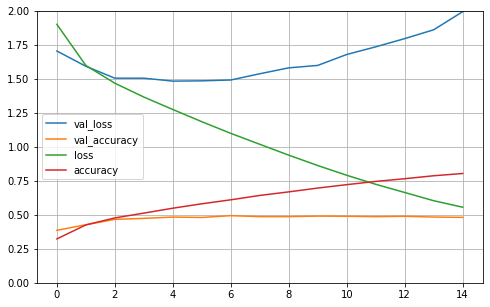

In [7]:
keras_plotter(history)

In [8]:
import numpy as np
y_pred=model1.predict(x_test)
y_pred_sparse=np.argmax(y_pred,axis=1)
y_test_sparse=np.argmax(y_test,axis=1)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test_sparse,y_pred_sparse)
print("Test Loss",acc)

Test Loss 0.4925


In [9]:
import numpy as np
y_pred=model1.predict(x_train)
y_pred_sparse=np.argmax(y_pred,axis=1)
y_train_sparse=np.argmax(y_train,axis=1)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_train_sparse,y_pred_sparse)
print("Train Loss",acc)

Train Loss 0.602775


In [11]:
import numpy as np
y_pred=model1.predict(x_val)
y_pred_sparse=np.argmax(y_pred,axis=1)
y_val_sparse=np.argmax(y_val,axis=1)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_val_sparse,y_pred_sparse)
print("Validation Loss",acc)

Validation Loss 0.4836
